In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("/kaggle/input/the-oxfordiiit-pet-dataset")
os.listdir() 

['images']

In [4]:
images = np.load('/kaggle/input/dataset-oxford-preprocessing/images_oxford.npy')
labels = np.load('/kaggle/input/dataset-oxford-preprocessing/labels_oxford.npy',allow_pickle = True)

In [5]:
set(labels)

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier'}

In [6]:
from collections import Counter
breeds = Counter(labels)
breeds

Counter({'american_pit_bull_terrier': 400,
         'leonberger': 400,
         'english_cocker_spaniel': 400,
         'Siamese': 400,
         'saint_bernard': 400,
         'american_bulldog': 400,
         'Sphynx': 400,
         'Egyptian_Mau': 400,
         'Birman': 400,
         'english_setter': 400,
         'newfoundland': 400,
         'pug': 400,
         'yorkshire_terrier': 400,
         'Abyssinian': 400,
         'havanese': 400,
         'miniature_pinscher': 400,
         'chihuahua': 400,
         'basset_hound': 400,
         'Bombay': 400,
         'British_Shorthair': 400,
         'Maine_Coon': 400,
         'Bengal': 400,
         'japanese_chin': 400,
         'shiba_inu': 400,
         'wheaten_terrier': 400,
         'beagle': 400,
         'Persian': 400,
         'great_pyrenees': 400,
         'pomeranian': 400,
         'samoyed': 400,
         'german_shorthaired': 400,
         'Ragdoll': 400,
         'keeshond': 400,
         'Russian_Blue': 400,
   

In [7]:
num_classes = len(breeds)
num_classes

37

In [8]:
images.shape, labels.shape

((14779, 224, 224, 3), (14779,))

In [9]:
images[0], images[0].shape

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 (224, 224, 3))

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

labels_encoded = to_categorical(labels_encoded)

2024-04-16 22:23:58.987148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 22:23:58.987248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 22:23:59.090336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
labels_encoded.shape

(14779, 37)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.30,stratify=labels_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50,stratify=y_test, random_state=42)

In [13]:
X_train.shape, y_train.shape

((10345, 224, 224, 3), (10345, 37))

In [14]:
X_val.shape, y_val.shape

((2217, 224, 224, 3), (2217, 37))

In [15]:
X_test.shape, y_test.shape

((2217, 224, 224, 3), (2217, 37))

In [16]:
import tensorflow as tf

# Define batch size
batch_size = 32

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Shuffle, batch, and prefetch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [17]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

In [18]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

In [19]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

# Calling the Pretrained Models - Resnet50, EfficientNetB0

In [20]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = len(breeds)
num_classes

37

In [21]:
# Create and compile the models
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# Model 1: Pretrained ResNet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet = create_model(base_model_resnet)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
# Model 2: Pretrained EfficientNetB0
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False)
model_efficientnet = create_model(base_model_efficientnet)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# Model 3: Fine-tuned ResNet50
base_model_resnet_fine_tune = ResNet50(weights='imagenet', include_top=False)
for layer in base_model_resnet_fine_tune.layers:
    layer.trainable = True
model_resnet_fine_tune = create_model(base_model_resnet_fine_tune)

In [25]:
# Model 4: Fine-tuned EfficientNetB0
base_model_efficientnet_fine_tune = EfficientNetB0(weights='imagenet', include_top=False)
for layer in base_model_efficientnet_fine_tune.layers:
    layer.trainable = True
model_efficientnet_fine_tune = create_model(base_model_efficientnet_fine_tune)


In [26]:
# Train the models
epochs = 10

In [27]:
history_resnet_base = model_resnet.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10


I0000 00:00:1713306347.207986      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713306347.316466      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.3355 - loss: 2.4313

W0000 00:00:1713306470.025277      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713306475.329393      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 219s 419ms/step - accuracy: 0.3360 - loss: 2.4294 - val_accuracy: 0.2765 - val_loss: 3.2358
Epoch 2/10


W0000 00:00:1713306482.914196      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.6691 - loss: 1.0262 - val_accuracy: 0.3351 - val_loss: 3.4365
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.8099 - loss: 0.5931 - val_accuracy: 0.6410 - val_loss: 1.2630
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.8728 - loss: 0.3806 - val_accuracy: 0.5201 - val_loss: 2.4945
Epoch 5/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.9031 - loss: 0.2965 - val_accuracy: 0.6991 - val_loss: 1.1095
Epoch 6/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.9330 - loss: 0.2208 - val_accuracy: 0.6193 - val_loss: 1.4436
Epoch 7/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.9300 - loss: 0.2101 - val_accuracy: 0.5462 - val_loss: 2.5268
Epoch 8/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.9470 - loss: 0.1550 - val_accuracy: 0.4808 - val_loss: 2.6170
Epoch 9/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 94s 291ms/step - accuracy: 0.9520 - loss: 0.1585 - val

In [28]:
history_efficientnet_base = model_efficientnet.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
  1/324 ━━━━━━━━━━━━━━━━━━━━ 10:08:07 113s/step - accuracy: 0.0312 - loss: 3.5594

W0000 00:00:1713307446.017393      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6609 - loss: 1.1883

W0000 00:00:1713307549.582067      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713307557.117198      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 231s 365ms/step - accuracy: 0.6613 - loss: 1.1870 - val_accuracy: 0.8065 - val_loss: 0.6532
Epoch 2/10
  1/324 ━━━━━━━━━━━━━━━━━━━━ 1:00 186ms/step - accuracy: 0.9375 - loss: 0.1828

W0000 00:00:1713307563.903147      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.8815 - loss: 0.3539 - val_accuracy: 0.8331 - val_loss: 0.6081
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9196 - loss: 0.2656 - val_accuracy: 0.8809 - val_loss: 0.4197
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.9290 - loss: 0.2194 - val_accuracy: 0.8809 - val_loss: 0.4274
Epoch 5/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9328 - loss: 0.2134 - val_accuracy: 0.8714 - val_loss: 0.4862
Epoch 6/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9498 - loss: 0.1543 - val_accuracy: 0.9238 - val_loss: 0.2752
Epoch 7/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9558 - loss: 0.1457 - val_accuracy: 0.9296 - val_loss: 0.2593
Epoch 8/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9579 - loss: 0.1350 - val_accuracy: 0.8656 - val_loss: 0.5639
Epoch 9/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9633 - loss: 0.1188 - val

In [29]:
# Save the model
model_resnet.save('/kaggle/working/model_resnet.keras')

In [30]:
# Save the model - efficietnet
model_efficientnet.save('/kaggle/working/model_efficientnet.keras')

In [31]:
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(X_test, y_test)
print(f"Test Loss for Resnet Model: {test_loss_resnet*100:.2f}%")
print(f"Test Accuracy for Resnet Model: {test_accuracy_resnet*100:.2f}%")

 2/70 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.6719 - loss: 1.0828

W0000 00:00:1713307962.711255      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.6721 - loss: 1.1922
Test Loss for Resnet Model: 115.48%
Test Accuracy for Resnet Model: 68.74%


W0000 00:00:1713307970.776933      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [32]:
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)
print(f"Test Loss for EfficientNet Model: {test_loss_efficientnet*100:.2f}%")
print(f"Test Accuracy for EfficientNet Model: {test_accuracy_efficientnet*100:.2f}%")

 4/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9277 - loss: 0.3140

W0000 00:00:1713307981.251389      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9234 - loss: 0.3346
Test Loss for EfficientNet Model: 29.67%
Test Accuracy for EfficientNet Model: 93.23%


W0000 00:00:1713307987.976898      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


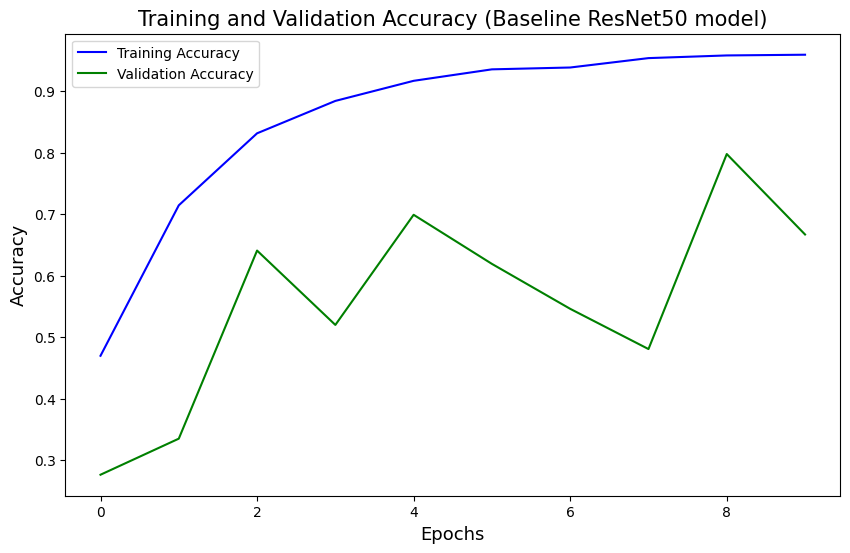

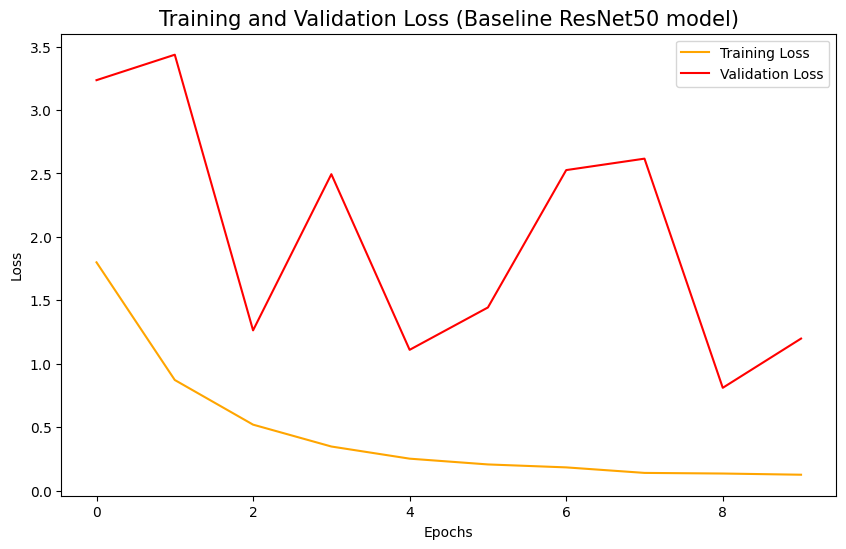

In [33]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_base.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_resnet_base.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (Baseline ResNet50 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_base.history['loss'], color="orange", label="Training Loss")
plt.plot(history_resnet_base.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Baseline ResNet50 model)", fontsize=15)
plt.legend()
plt.show()


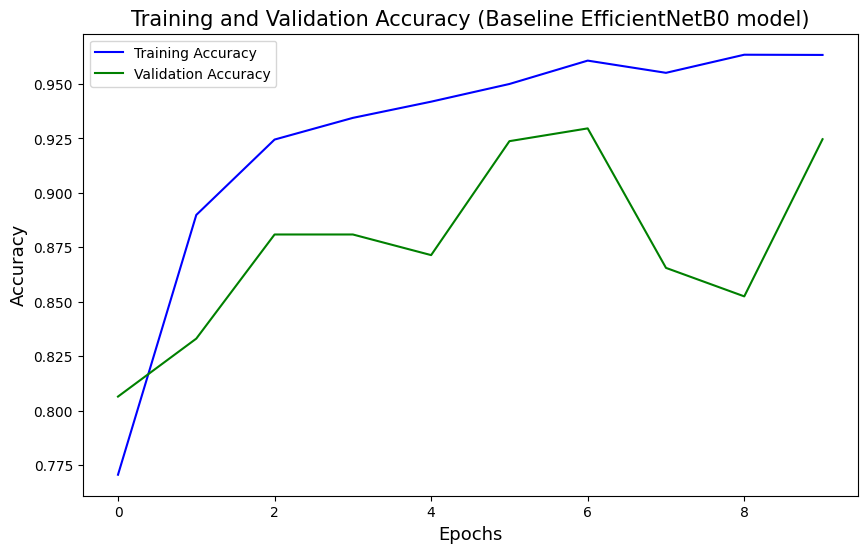

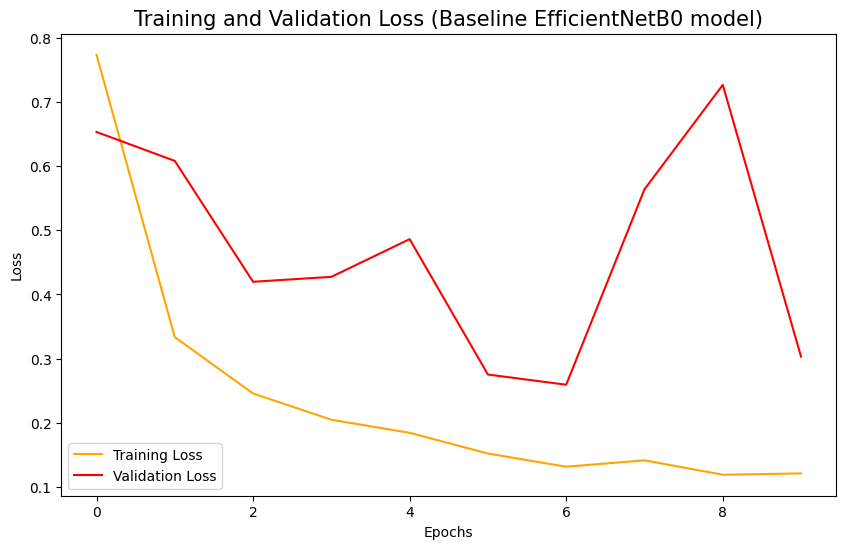

In [34]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficientnet_base.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_efficientnet_base.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (Baseline EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficientnet_base.history['loss'], color="orange", label="Training Loss")
plt.plot(history_efficientnet_base.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Baseline EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

In [35]:
# Make predictions
predictions_resnet = model_resnet.predict(X_test)
predictions_effnet = model_efficientnet.predict(X_test)

# Convert predictions to labels
predictions_resnet = np.argmax(predictions_resnet, axis=1)
predictions_effnet = np.argmax(predictions_effnet, axis=1)

print("ResNet50 Predictions:", predictions_resnet)
print("EfficientNetB0 Predictions:", predictions_effnet)

 3/70 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step

W0000 00:00:1713307998.780307      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step


W0000 00:00:1713308008.596553      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/70 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step

W0000 00:00:1713308016.514230      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step
ResNet50 Predictions: [ 9  2  2 ... 20  8 16]
EfficientNetB0 Predictions: [ 9  8 24 ... 20 31 16]


W0000 00:00:1713308025.748888      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


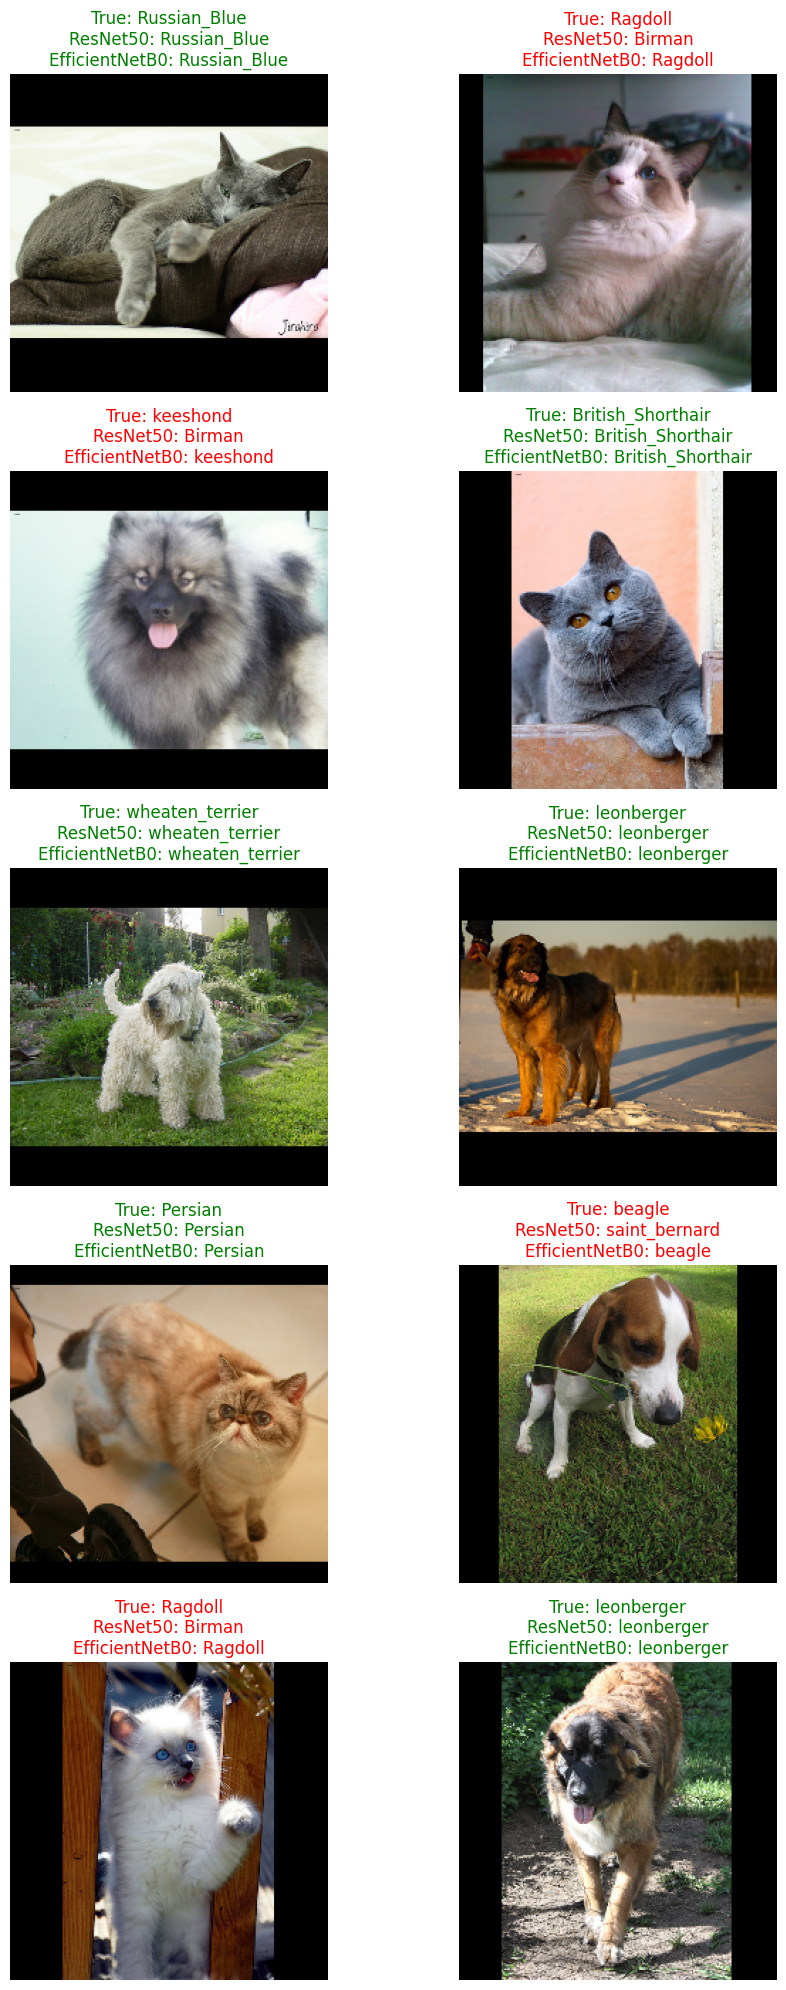

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_resnet_names = label_encoder.inverse_transform(predictions_resnet)
predictions_effnet_names = label_encoder.inverse_transform(predictions_effnet)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_resnet = predictions_resnet_names[i]
    predicted_label_effnet = predictions_effnet_names[i]
    
    title = ax.set_title(f"True: {true_label}\nResNet50: {predicted_label_resnet}\nEfficientNetB0: {predicted_label_effnet}")
    if predicted_label_resnet == predicted_label_effnet == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [37]:
history_resnet_fine_tune = model_resnet_fine_tune.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15


W0000 00:00:1713308093.844582      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.3431 - loss: 2.3501

W0000 00:00:1713308207.121938      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713308211.783955      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 188s 387ms/step - accuracy: 0.3435 - loss: 2.3483 - val_accuracy: 0.3829 - val_loss: 2.4644
Epoch 2/15


W0000 00:00:1713308219.180691      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 294ms/step - accuracy: 0.6899 - loss: 0.9784 - val_accuracy: 0.3532 - val_loss: 2.9466
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.7978 - loss: 0.6355 - val_accuracy: 0.6080 - val_loss: 1.3387
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 293ms/step - accuracy: 0.8680 - loss: 0.3962 - val_accuracy: 0.6419 - val_loss: 1.5309
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.9050 - loss: 0.3078 - val_accuracy: 0.5318 - val_loss: 1.7185
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.9215 - loss: 0.2378 - val_accuracy: 0.6220 - val_loss: 1.3647
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.9482 - loss: 0.1596 - val_accuracy: 0.5404 - val_loss: 1.7798
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.9493 - loss: 0.1654 - val_accuracy: 0.5616 - val_loss: 2.0664
Epoch 9/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 292ms/step - accuracy: 0.9660 - loss: 0.1171 - val

In [38]:
# Save the model - Resnet50 Fine tune
model_resnet_fine_tune.save('/kaggle/working/model_resnet_fine_tune.keras')

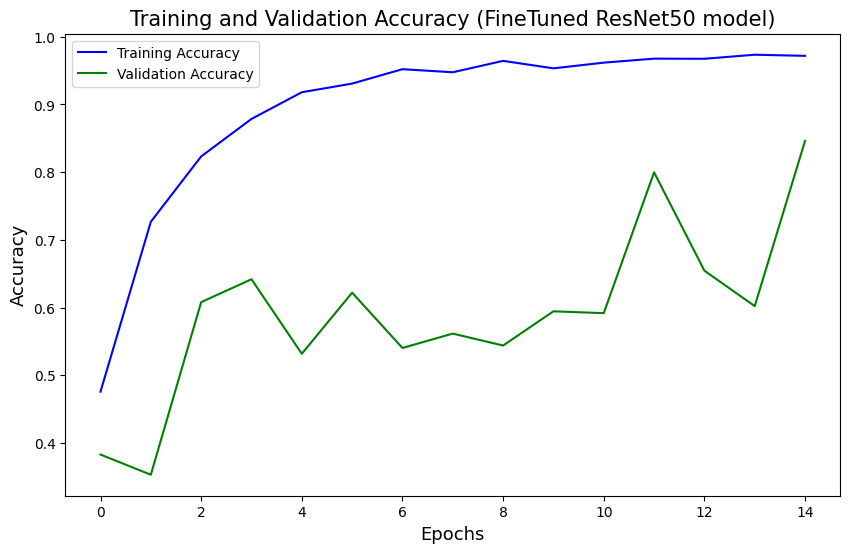

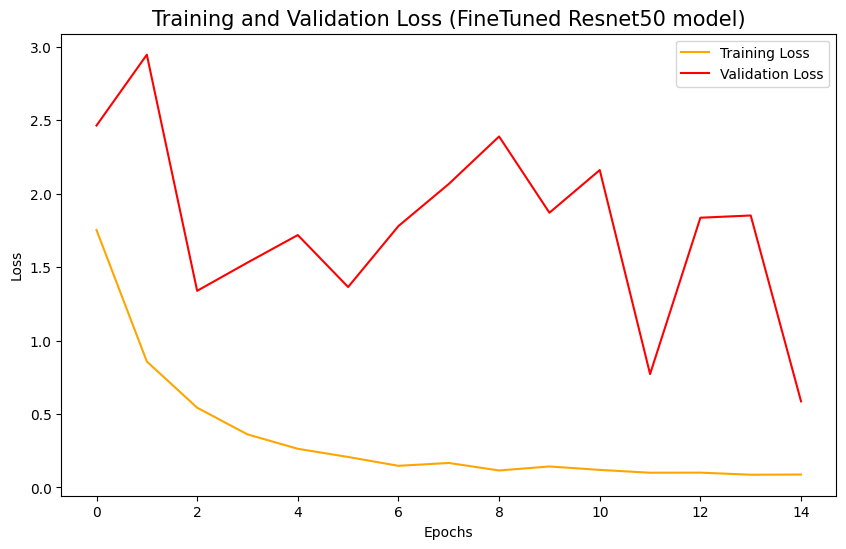

In [39]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_fine_tune.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_resnet_fine_tune.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (FineTuned ResNet50 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_fine_tune.history['loss'], color="orange", label="Training Loss")
plt.plot(history_resnet_fine_tune.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (FineTuned Resnet50 model)", fontsize=15)
plt.legend()
plt.show()

In [40]:
test_loss_resnet_fine_tune, test_accuracy_resnet_fine_tune = model_resnet_fine_tune.evaluate(X_test, y_test)
print(f"Test Loss for Fine Tuned Resnet Model: {test_loss_resnet_fine_tune*100:.2f}%")
print(f"Test Accuracy for Fine Tuned Resnet Model: {test_accuracy_resnet_fine_tune*100:.2f}%")

 2/70 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8359 - loss: 0.6812

W0000 00:00:1713309608.765877      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.8586 - loss: 0.5571
Test Loss for Fine Tuned Resnet Model: 52.04%
Test Accuracy for Fine Tuned Resnet Model: 86.51%


W0000 00:00:1713309616.353115      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [41]:
# Make predictions
predictions_resnet_fine_tune = model_resnet_fine_tune.predict(X_test)

# Convert predictions to labels
predictions_resnet_fine_tune = np.argmax(predictions_resnet_fine_tune, axis=1)

print("Fine Tuned ResNet50 Predictions:", predictions_resnet_fine_tune)

 3/70 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step

W0000 00:00:1713309623.965745      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step
Fine Tuned ResNet50 Predictions: [ 4  8 24 ... 16 31 16]


W0000 00:00:1713309633.448020      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


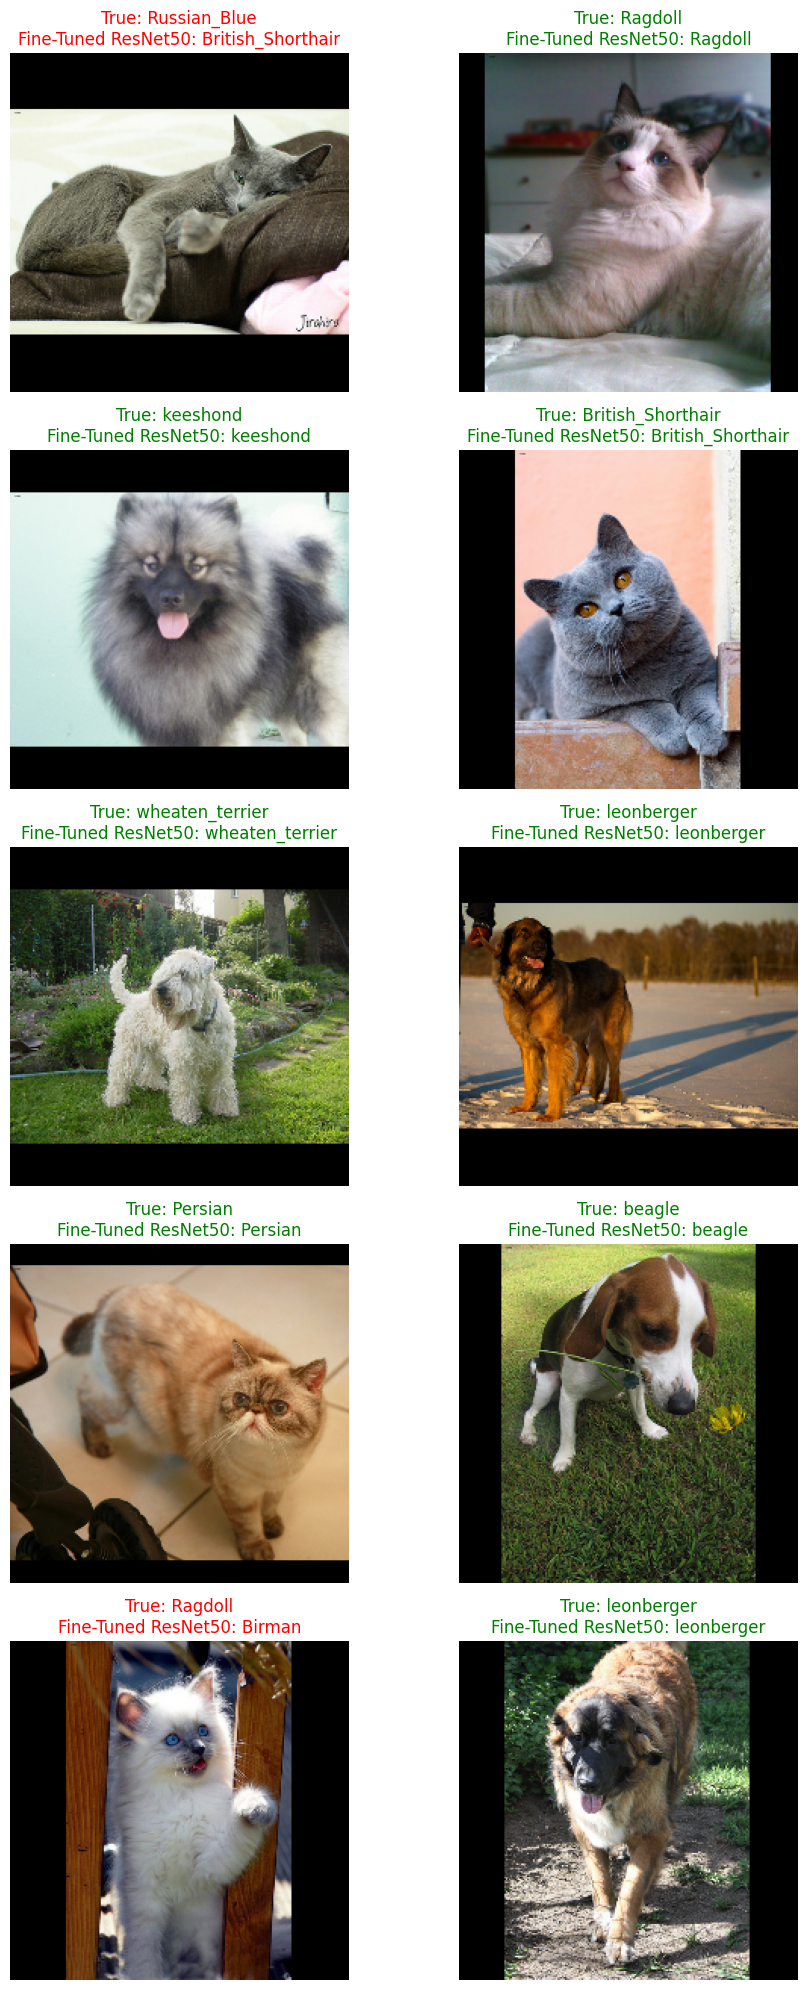

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_resnet_fine_tune_names = label_encoder.inverse_transform(predictions_resnet_fine_tune)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_resnet_fine_tune = predictions_resnet_fine_tune_names[i]
    
    title = ax.set_title(f"True: {true_label}\nFine-Tuned ResNet50: {predicted_label_resnet_fine_tune}")
    if predicted_label_resnet_fine_tune == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [43]:
history_efficient_fine_tune = model_efficientnet_fine_tune.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15
  1/324 ━━━━━━━━━━━━━━━━━━━━ 8:14:16 92s/step - accuracy: 0.0625 - loss: 3.5901

W0000 00:00:1713309732.086203      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6575 - loss: 1.1778

W0000 00:00:1713309821.107539      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713309827.818960      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 193s 314ms/step - accuracy: 0.6578 - loss: 1.1765 - val_accuracy: 0.7727 - val_loss: 0.8439
Epoch 2/15
  1/324 ━━━━━━━━━━━━━━━━━━━━ 59s 184ms/step - accuracy: 0.8750 - loss: 0.2953

W0000 00:00:1713309833.702964      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.8919 - loss: 0.3484 - val_accuracy: 0.8155 - val_loss: 0.7123
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9205 - loss: 0.2589 - val_accuracy: 0.8854 - val_loss: 0.4092
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9360 - loss: 0.2012 - val_accuracy: 0.9098 - val_loss: 0.3403
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9506 - loss: 0.1600 - val_accuracy: 0.9093 - val_loss: 0.3486
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9422 - loss: 0.1814 - val_accuracy: 0.9157 - val_loss: 0.3322
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.9600 - loss: 0.1309 - val_accuracy: 0.9147 - val_loss: 0.3272
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9624 - loss: 0.1249 - val_accuracy: 0.9202 - val_loss: 0.3472
Epoch 9/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - accuracy: 0.9674 - loss: 0.1010 - val

In [44]:
# Save the model - EfficientNetB0 Fine tune
model_efficientnet_fine_tune.save('/kaggle/working/model_efficientnet_fine_tune.keras')

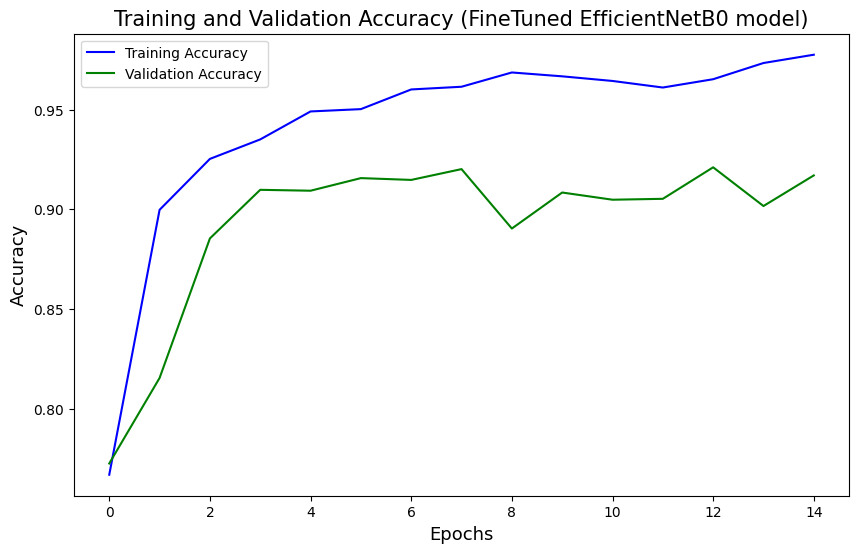

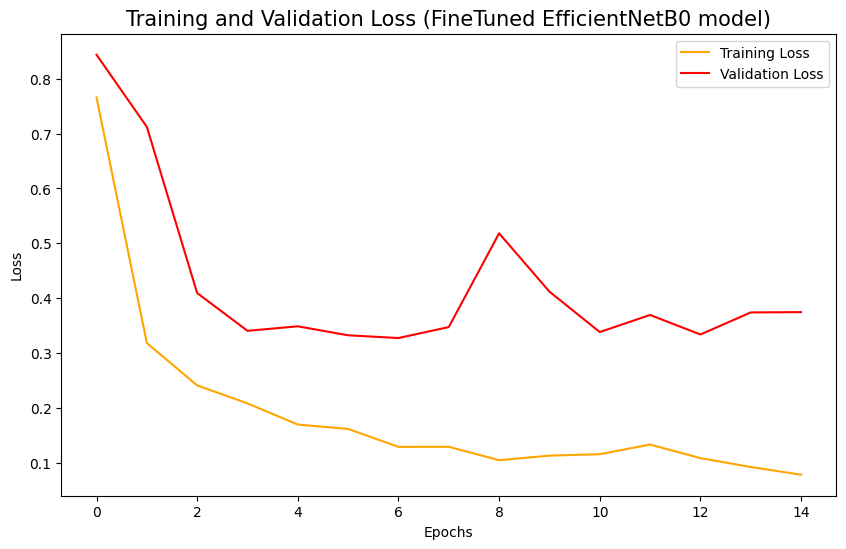

In [45]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficient_fine_tune.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_efficient_fine_tune.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (FineTuned EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficient_fine_tune.history['loss'], color="orange", label="Training Loss")
plt.plot(history_efficient_fine_tune.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (FineTuned EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

In [46]:
test_loss_efficientnet_fine_tune, test_accuracy_efficientnet_fine_tune = model_efficientnet_fine_tune.evaluate(X_test, y_test)
print(f"Test Loss for Fine Tuned EfficientNetB0 Model: {test_loss_efficientnet_fine_tune*100:.2f}%")
print(f"Test Accuracy for Fine Tuned EfficientNetB0 Model: {test_accuracy_efficientnet_fine_tune*100:.2f}%")

 3/70 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9010 - loss: 0.4867

W0000 00:00:1713310532.719826      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9106 - loss: 0.4135


W0000 00:00:1713310538.860725      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss for Fine Tuned EfficientNetB0 Model: 36.02%
Test Accuracy for Fine Tuned EfficientNetB0 Model: 92.15%


In [47]:
# Make predictions
predictions_efficientnet_fine_tune = model_efficientnet_fine_tune.predict(X_test)

# Convert predictions to labels
predictions_efficientnet_fine_tune = np.argmax(predictions_efficientnet_fine_tune, axis=1)

print("Fine Tuned EfficientNetB0 Predictions:", predictions_efficientnet_fine_tune)

 5/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

W0000 00:00:1713310549.643876      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step
Fine Tuned EfficientNetB0 Predictions: [ 9  8 24 ... 20 31 16]


W0000 00:00:1713310558.132562      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


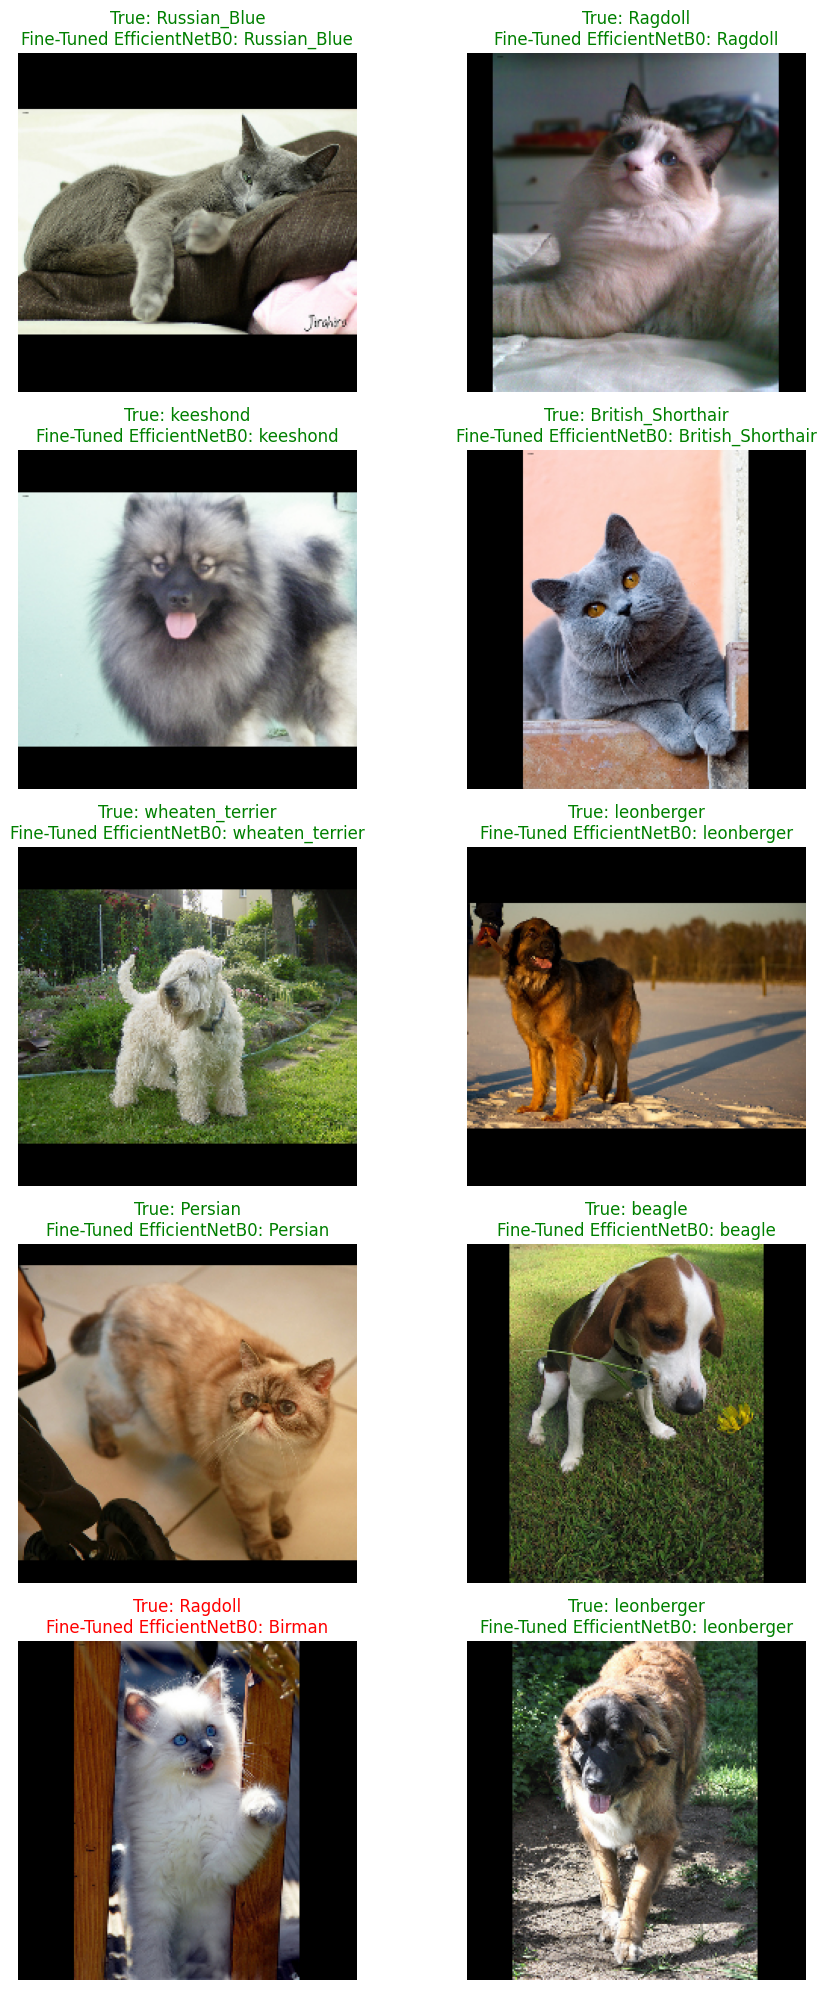

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_efficientnet_fine_tune_names = label_encoder.inverse_transform(predictions_efficientnet_fine_tune)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_efficientnet_fine_tune = predictions_efficientnet_fine_tune_names[i]
    
    title = ax.set_title(f"True: {true_label}\nFine-Tuned EfficientNetB0: {predicted_label_efficientnet_fine_tune}")
    if predicted_label_efficientnet_fine_tune == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()